### Problem Statement:
With the growing consumption of avocados in the USA, a freelance company would like to do some analysis on the patterns of consumption in different cities and would like to come up with a prediction model for the price of avocados. For this to be implemented, build a prediction model using multilinear regression and provide your insights on it.

### Business Objective:
A freelance company wants to analyze avocado consumption patterns in different U.S. cities and build a prediction model for avocado prices. Understanding price trends will help businesses, farmers, and retailers make informed pricing and stocking decisions based on historical data.



## 1. Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Load the dataset

In [22]:
df = pd.read_csv("C:/Data Science/Assignment Data/Multilinear_Dataset/Avacado_Price.csv")

In [23]:
df

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
df.describe()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.isnull().sum()

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## 3. Select Relevant Features

In [9]:
# Selecting necessary columns
df = df[['AveragePrice', 'Total_Volume', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags']]

# Display first few rows of filtered data
print(df.head())

   AveragePrice  Total_Volume  Total_Bags  Small_Bags  Large_Bags  XLarge Bags
0          1.33      64236.62     8696.87     8603.62       93.25          0.0
1          1.35      54876.98     9505.56     9408.07       97.49          0.0
2          0.93     118220.22     8145.35     8042.21      103.14          0.0
3          1.08      78992.15     5811.16     5677.40      133.76          0.0
4          1.28      51039.60     6183.95     5986.26      197.69          0.0


## 4. Define Features (X) and Target (y)

In [10]:
# Define independent variables (features) and dependent variable (target)
X = df.drop(columns=['AveragePrice'])  # Features
y = df['AveragePrice']                 # Target variable

## 5. Split Data into Training and Testing Sets

In [11]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape of training and test sets
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Test set: {X_test.shape}")

Training set: (14599, 5), Test set: (3650, 5)
Test set: (3650, 5)


## 6.Train the Multiple Linear Regression Model

In [12]:
# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 1.424202027909827
Coefficients: [-4.24278168e-08 -4.58573022e-02  4.58574111e-02  4.58572057e-02
  4.58580133e-02]


🔹The intercept represents the base price when all features are zero.

🔹 The coefficients indicate how much the price changes when a specific feature increases by one unit

## 7.Make Predictions

In [13]:
# Predict avocado prices using the test set
y_pred = model.predict(X_test)

# Compare actual vs predicted values
comparison = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(comparison.head())

       Actual Price  Predicted Price
8604           0.82         1.421041
2608           0.97         1.408002
14581          1.44         1.424332
4254           0.97         1.419525
16588          1.45         1.424591


## 8.Evaluate Model Performance

In [15]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R² Score: 0.04


Your R² score is very low (0.04), meaning the model explains only 4% of the variance in avocado prices. This suggests that the selected features do not strongly influence the price.

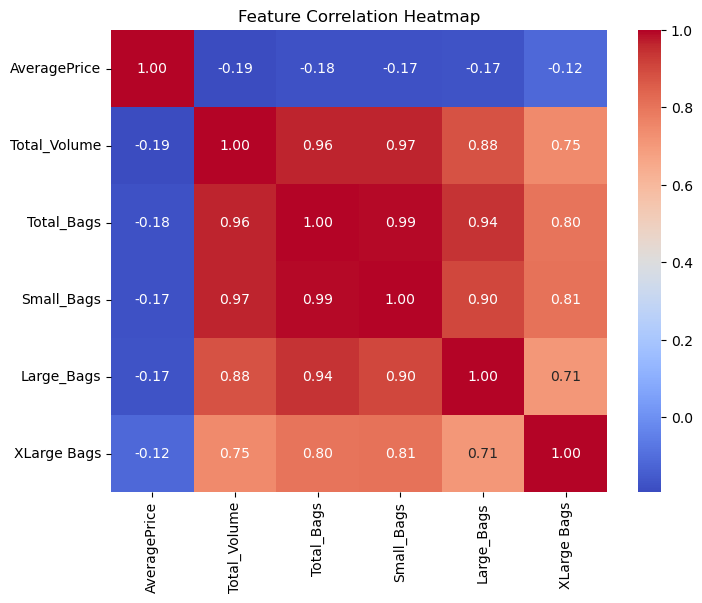

In [16]:
# Checking teh features correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

1. Low correlation between AveragePrice and all other features (-0.19, -0.18, etc.).

  -->  This suggests that the current features do not strongly influence price.
    
  -->We need better features (e.g., region, year, type).

2. High correlation among volume and bag types (0.96–0.99).

  --> Total Volume, Total Bags, and Small Bags are almost the same data.
  
  --> We should remove redundant features to avoid multicollinearity.

In [19]:
# load the data set again
df = pd.read_csv("C:/Data Science/Assignment Data/Multilinear_Dataset/Avacado_Price.csv")

### Feature Engineering
We will one-hot encode categorical features like region and type.

In [26]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['region', 'type'], drop_first=True)

# Display first few rows after encoding
print(df.head())

   AveragePrice  Total_Volume  tot_ava1   tot_ava2  tot_ava3  Total_Bags  \
0          1.33      64236.62   1036.74   54454.85     48.16     8696.87   
1          1.35      54876.98    674.28   44638.81     58.33     9505.56   
2          0.93     118220.22    794.70  109149.67    130.50     8145.35   
3          1.08      78992.15   1132.00   71976.41     72.58     5811.16   
4          1.28      51039.60    941.48   43838.39     75.78     6183.95   

   Small_Bags  Large_Bags  XLarge Bags  year  ...  region_SouthCentral  \
0     8603.62       93.25          0.0  2015  ...                    0   
1     9408.07       97.49          0.0  2015  ...                    0   
2     8042.21      103.14          0.0  2015  ...                    0   
3     5677.40      133.76          0.0  2015  ...                    0   
4     5986.26      197.69          0.0  2015  ...                    0   

   region_Southeast  region_Spokane  region_StLouis  region_Syracuse  \
0                 0       

## Feature Selection
From the correlation heatmap you provided, we see that some features are highly correlated.
We will remove redundant features like 'Total Bags' and 'Small Bags'.We will one-hot encode categorical features like region and type.

In [28]:
# Drop highly correlated features
df.drop(columns=['Total_Bags', 'Small_Bags'], inplace=True)

# Display remaining columns
print(df.columns)

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Large_Bags', 'XLarge Bags', 'year', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_Raleigh

##  Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
X = df.drop(columns=['AveragePrice'])  # Features
y = df['AveragePrice']  # Target variable

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (14599, 61), Test set: (3650, 61)


## Train Multiple Models
We will compare Linear Regression, Polynomial Regression, and Random Forest.

In [31]:
# Linear Regression (baseline)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate
print("🔹 Linear Regression Results")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")

🔹 Linear Regression Results
MAE: 0.20
MSE: 0.07
RMSE: 0.27
R² Score: 0.55


In [32]:
# Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures

# Transform features to polynomial degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = lr_poly.predict(X_test_poly)

# Evaluate
print("🔹 Polynomial Regression Results")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.2f}")

🔹 Polynomial Regression Results
R² Score: 0.66


In [33]:
# Random Forest Regression (Better for Complex Data)
from sklearn.ensemble import RandomForestRegressor

# Train Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🔹 Random Forest Results")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")

🔹 Random Forest Results
R² Score: 0.85
